# Geometric Transformations of Images

## Goals

* Learn to apply different geometric transformation to images like translation, rotation, affine transformation etc.
* You will see these functions: `cv2.getPerspectiveTransform`

## Transformations

> ## Trnasformation이란?
> The function to conver an specific coordinate **x** into other coodinate system **x'**

* **Rigid-body** transformation : 
  * size and angle are preserved. 
  * i.e., **Translation**, **Rotation**
  * It is called Eucledean transformation.
* Similarity transformation : 
  * Rigid-body transformation + (Isotropic )Scaling
  * angle is preserved but 
  * *size can be changed*. 
  * i.e., **(Isotropic )Scaling**
* Linear transformation : 
  * Function to mapping on the vector space. 
  * It specifies **homogeniety** and **addivity**.
  * **Scaling**, **Shear**, **Reflection**,  and **Rotation about the origin**
* **Affine** transformation : 
  * Linear transfomation + Translation. 
  * Function between affine spaces which preserves points, straight lines and planes.
* **Perpective** transformation (원근변환) : 
  * Affine transformation w/o the property to keep parallel lines.
  * 3D 공간의 입체적인 물체를 평면에 투영하는데 사용되며 원근감이 표현됨.
  * Homograpy라고도 불림.


OpenCV provides two transformation functions, 
* `cv2.warpAffine` and 
* `cv2.warpPerspective`, with which you can have all kinds of transformations. 


`cv2.warpAffine` takes a 2x3 transformation matrix (6DOFs) while `cv2.warpPerspective` takes a 3x3 transformation matrix(8DOFs) as input.

> Note: Warping Transformation
> * 굴곡 변환
> * 비선형적 기하학적 연산

## Translation

Translation is the shifting of object’s location. If you know the shift in $(x,y)$ direction, let it be $(t_x,t_y)$, you can create the transformation matrix $\textbf{M}$ as follows:

$$
M = \begin{bmatrix} 
1 & 0 & t_x \\ 
0 & 1 & t_y  
\end{bmatrix}
$$

You can take make it into a **Numpy array of type** `np.float32` and pass it into `cv2.warpAffine()` function. 

See below example for a shift of (150,50):

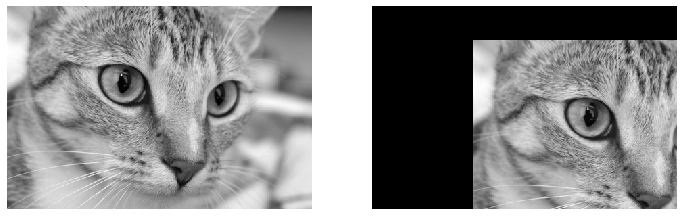

In [31]:
from skimage import data
from skimage import img_as_ubyte,img_as_float
import cv2
import numpy as np
import matplotlib.pyplot as plt

cat = data.chelsea() # take the test image of cat!
img = cv2.cvtColor(cat, cv2.COLOR_RGB2GRAY)
# img = cv2.imread('cat_cv.tif',0)

rows,cols = img.shape

M = np.float32([[1,0,150],
                [0,1,50]])

dst = cv2.warpAffine(img,M,(cols,rows))

# cv2.imshow('img',dst)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.figure(figsize=(12,12))
plt.subplot(121); plt.imshow(img, cmap='gray'), plt.axis('off')
plt.subplot(122); plt.imshow(dst, cmap='gray'), plt.axis('off')
plt.show()


## Rotation

Rotation of an image for an angle $\theta$ can also be done using `wrapAffine()`--only the transformation matrix changes.

The transformation matrix for the rotation is as follows:

$$
M = \begin{bmatrix} 
cos\theta & -sin\theta \\ 
sin\theta & cos\theta   
\end{bmatrix}
$$

But OpenCV provides **scaled rotation** with **adjustable center of rotation** so that you can rotate at any location you prefer. 
Modified transformation matrix is given by

$$
\begin{bmatrix} 
\alpha &  \beta & (1- \alpha )  \cdot center.x -  \beta \cdot center.y \\ 
- \beta &  \alpha &  \beta \cdot center.x + (1- \alpha )  \cdot center.y 
\end{bmatrix}
$$

where:

$$
\begin{array}{l} 
\alpha =  scale \cdot \cos \theta , \\ 
\beta =  scale \cdot \sin \theta 
\end{array}
$$

To find this transformation matrix, OpenCV provides a function, `cv2.getRotationMatrix2D`. 
It takes the center for rotation, angle of rotation, and scaling factor as input.

Check below example which rotates the image by 90 degree with respect to center without any scaling.

[[  0.8660254    0.5        -44.78872855]
 [ -0.5          0.8660254  132.84618943]]


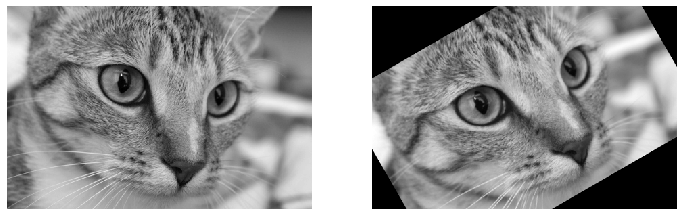

In [33]:
img = cv2.imread('cat_cv.tif',0)
rows,cols = img.shape # there is no channel

#------------------------------------
# getRotationMatrix2D
# the rotation center is given by Tupple.
# (center.x cneter.y), rotation degree, scale
M = cv2.getRotationMatrix2D((cols/2,rows/2),30,1)
print(M)

dst = cv2.warpAffine(img,M,(cols,rows))

# cv2.imshow('img',dst)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.figure(figsize=(12,12))
plt.subplot(121); plt.imshow(img, cmap='gray'), plt.axis('off')
plt.subplot(122); plt.imshow(dst, cmap='gray'), plt.axis('off')
plt.show()

## Scaling

Scaling is just resizing of the image. 

OpenCV comes with a function `cv2.resize()` for this purpose. 

> **cv2.resize(img, dsize, fx, fy, interpolation)**
> * img : source image
> * dsize : desired size (speicified manually), tuple (width,height)
> * fx : scale factor along the horizontal axis
> * fy : scale factor along the vertical axis
> * interpolation

The size of the image can be specified manually, or you can specify **the scaling factor**. 

Different **interpolation method**s are used. 
* Preferable interpolation methods are `cv2.INTER_AREA` for **shrinking** and 
* `cv2.INTER_CUBIC` (slow) & `cv2.INTER_LINEAR` for **zooming**. 

By default, interpolation method used is `cv2.INTER_LINEAR` for all resizing purposes. 
  
  Various interpolation alogrithms are provided by opencv as follows;
  * cv2.INTER_AREA
    * It is perferred for shrinking the image size.
  * cv2.INTER_LINEAR
    * default algorithm.
    * It is commonly used for zooming.
  * cv2.INTER_CUBIC
    * It is used for zooming with a better quality but slow.
  * cv2.INTER_NEAREST
    * Very fast but quaility is not good.

You can resize an input image either of following methods:

In [12]:
import cv2
import numpy as np

#img = cv2.imread('cat_cv.tif')

height, width = img.shape[:2]
print("original dimension : ({}, {}, {})".format(height,width,channel))


#-------------------
zoomed_cat = cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
#OR
zoomed_cat = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)
#-------------------

print("modified dimension :",zoomed_cat.shape)
cv2.imshow('zoomed_cat',zoomed_cat)
# cv2_imshow(zoomed_cat)

zoomed_cat_NN = cv2.resize(img, (2*width,2*height), interpolation = cv2.INTER_NEAREST)
cv2.imshow('zoomed_cat_NN',zoomed_cat_NN)
#cv2_imshow(zoomed_cat_NN)

cv2.waitKey(0)
cv2.destroyAllWindows()

original dimension : (300, 451, 3)
modified dimension : (600, 902)


## Review : Cropping

In opencv, cropping is provided by using the slicing of python. Slicing an array is just taking the array values within pariticular index range.

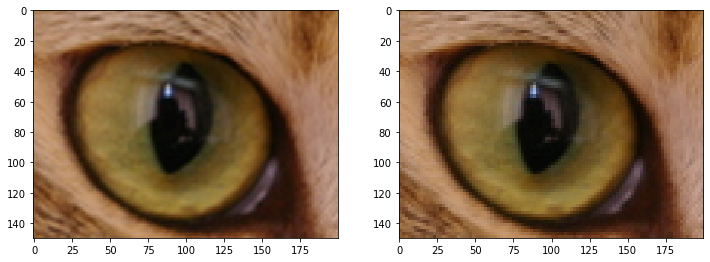

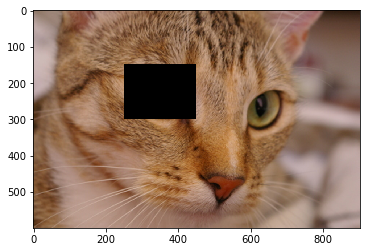

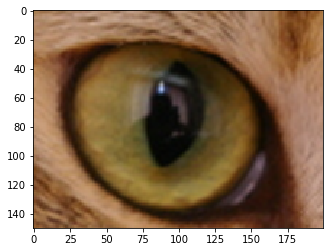

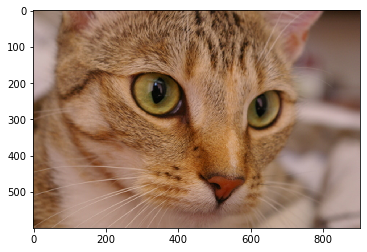

In [7]:
import matplotlib.pyplot as plt

zoomed_cat = cv2.cvtColor(zoomed_cat,cv2.COLOR_RGB2BGR)
zoomed_cat_NN = cv2.cvtColor(zoomed_cat_NN,cv2.COLOR_RGB2BGR)

cropped_img0 = zoomed_cat[150:300,250:450]
#cv2_imshow(cropped_img0)
cropped_img1 = zoomed_cat_NN[150:300,250:450]
#cv2_imshow(cropped_img1)

plt.figure(figsize=(12,12))
plt.subplot(121); plt.imshow(cropped_img0) # expects distored color
plt.subplot(122); plt.imshow(cropped_img1) # expects true color
plt.show()


#--------------------------------------
# be careful to modify the cropped img.
tmp = cropped_img0.copy()
cropped_img0[:]=0

#cv2_imshow(zoomed_cat)
#cv2_imshow(tmp)
plt.imshow(zoomed_cat)
plt.show()
plt.imshow(tmp)
plt.show()

zoomed_cat[150:300,250:450]=tmp
#cv2_imshow(zoomed_cat)
plt.imshow(zoomed_cat)
plt.show()

## Affine Transformation

In affine transformation, all parallel lines in the original image will still be parallel in the output image. 

To find the transformation matrix, we need **three points** from input image and their corresponding locations in output image. 

Then `cv2.getAffineTransform` will create a 2x3 matrix which is to be passed to `cv2.warpAffine`.

Check below example, and also look at the points I selected (which are marked in Green color):

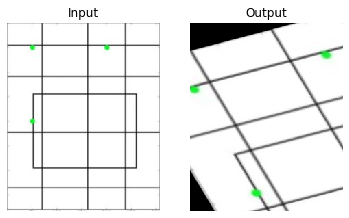

In [29]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('images/drawing.png')
rows,cols,ch = img.shape

pts1 = np.float32([[38,38],[145,38],[38,145]])   
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(cols,rows))



plt.subplot(121),plt.imshow(img),plt.title('Input'),plt.axis('off')
plt.subplot(122),plt.imshow(dst),plt.title('Output'),plt.axis('off')
plt.show()

### The example for the Affine Transformation

opencv의 mouse callback function을 이용한 예제임.


In [19]:
import cv2
import numpy as np

points = []

# 왼쪽 상단, 오른쪽 상단, 왼쪽 하단, 오른쪽 하단 순으로 클릭하시오.

# mouse callback function
def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        global points
        cv2.circle(img,(x,y),10,(255,0,0),-1)
        print(x,y)
        points.append([x,y])
        
        
# Create a black image, a window and bind the function to window
img = cv2.imread('images/drawing.png')
rows,cols,ch = img.shape
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    if cv2.waitKey(20) & 0xFF == 27: # enter ESC
        break
    if len(points) == 3:
        pts1 = np.float32(points)
        pts2 = np.float32([[10,100],[200,50],[100,250]])
        M = cv2.getAffineTransform(pts1,pts2)        
        dst = cv2.warpAffine(img,M,(cols,rows))
        cv2.imshow('after',dst)
        
cv2.destroyAllWindows()

38 35
146 36
37 143


## Perspective Transformation

For perspective transformation, you need a 3x3 transformation matrix. 

$$
\begin{bmatrix} w\hat{x} \\ w\hat{y} \\ w \end{bmatrix}
=
\begin{bmatrix}
a & b & c \\
d & e & f \\
g & h & 1 
\end{bmatrix}
\begin{bmatrix}
x \\ y \\ 1
\end{bmatrix}
$$


Straight lines will remain straight even after the transformation. 
* Perspective(원근법) 변환은 선의 성질만 유지(직선은 변환 후에도 직선)
* 단, 선의 평행성은 유지가 되지 않음

To find **Perspective Transformation Matrix**, we need **4 points** on the input image and corresponding points on the output image. 
* Among these 4 points, **3 of them should _not be collinear_**. 

Then transformation matrix can be found by the function `cv2.getPerspectiveTransform`. 
* 8 variables can be obtained by following matrix equation.
* 8 variables = 8 Degree of freedom (8DOF)

$$
\begin{bmatrix} \hat{x}_1 \\ \hat{y}_1 \\ \hat{x}_2 \\ \hat{y}_2 \\ \hat{x}_3 \\ \hat{y}_3 \\ \hat{x}_4 \\ \hat{y}_4 \end{bmatrix}
=
\begin{bmatrix}
x_1 & y_1 & 1 & 0 & 0 & 0 & -x_1\hat{x}_1 & -\hat{x}_1y_1 \\
0 & 0 & 0 & x_1 & y_1 & 1 & -x_1\hat{y}_1 & -y_1\hat{y}_1 \\
x_2 & y_2 & 1 & 0 & 0 & 0 & -x_2\hat{x}_2 & -\hat{x}_2y_2 \\
0 & 0 & 0 & x_2 & y_2 & 1 & -x_2\hat{y}_2 & -y_2\hat{y}_2 \\
x_3 & y_3 & 1 & 0 & 0 & 0 & -x_3\hat{x}_3 & -\hat{x}_3y_3 \\
0 & 0 & 0 & x_3 & y_3 & 1 & -x_3\hat{y}_3 & -y_3\hat{y}_3 \\
x_4 & y_4 & 1 & 0 & 0 & 0 & -x_4\hat{x}_4 & -\hat{x}_4y_4 \\
0 & 0 & 0 & x_4 & y_4 & 1 & -x_4\hat{y}_4 & -y_4\hat{y}_4 
\end{bmatrix}
\begin{bmatrix}
a \\ b \\ c \\ d \\ e \\ f \\ g \\ h
\end{bmatrix}
$$

Then apply `cv2.warpPerspective` with this 3x3 transformation matrix.

See the code below:

<class 'numpy.ndarray'>
[[-2.02153837e+00 -1.02691611e+00  2.04001743e+03]
 [-2.24880859e-02 -3.30149532e+00  3.31389904e+03]
 [-2.62496544e-04 -1.74594051e-03  1.00000000e+00]]


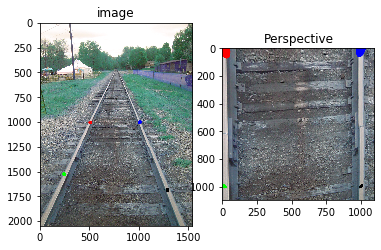

In [43]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/Railroad-Tracks-Perspective.jpg')
# [x,y] 좌표점을 4x2의 행렬로 작성
# 좌표점은 좌상->좌하->우상->우하
pts1 = np.float32([[504,1003],[243,1525],[1000,1000],[1280,1685]])

# 좌표의 이동점
pts2 = np.float32([[10,10],[10,1000],[1000,10],[1000,1000]])

# pts1의 좌표에 표시. perspective 변환 후 이동 점 확인.
cv2.circle(img, (504,1003), 20, (255,0,0),-1)
cv2.circle(img, (243,1524), 20, (0,255,0),-1)
cv2.circle(img, (1000,1000), 20, (0,0,255),-1)
cv2.circle(img, (1280,1685), 20, (0,0,0),-1)

M = cv2.getPerspectiveTransform(pts1, pts2)
print(type(M))
print(M)

dst = cv2.warpPerspective(img, M, (1100,1100))

plt.subplot(121),plt.imshow(img),plt.title('image')
plt.subplot(122),plt.imshow(dst),plt.title('Perspective')
plt.show()


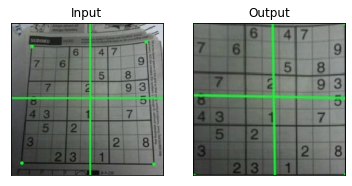

In [37]:
img = cv2.imread('images/sudokusmall.png')
rows,cols,ch = img.shape

pts1 = np.float32([[62,69],[392,54],[31,404],[413,410]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(300,300))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.xticks([]);plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.xticks([]);plt.yticks([])
plt.show()

### The example for the Perspective Transformation

opencv의 mouse callback function을 이용한 예제임.

In [40]:
import cv2
import numpy as np

points = []

# 왼쪽 상단, 오른쪽 상단, 왼쪽 하단, 오른쪽 하단 순으로 클릭하시오.

# mouse callback function
def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        global points
        cv2.circle(img,(x,y),10,(255,0,0),-1)
        print(x,y)
        points.append([x,y])
        
        
# Create a black image, a window and bind the function to window
img = cv2.imread('images/sudoku.jpg')
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    if cv2.waitKey(20) & 0xFF == 27: # enter ESC
        break
    if len(points) == 4:
        pts1 = np.float32(points)
        pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
        M = cv2.getPerspectiveTransform(pts1,pts2)        
        dst = cv2.warpPerspective(img,M,(300,300))
        cv2.imshow('after',dst)
        
cv2.destroyAllWindows()

44 50
279 42
21 294
295 295


## Rotation in 3D using OpenCV's warpPerspective

![fig](./images/3D_rotation_focal_length.gif)

height: 300 width: 451
[[   100.      0. -11275.]
 [     0.    100.  -7500.]
 [     0.      0.     50.]]


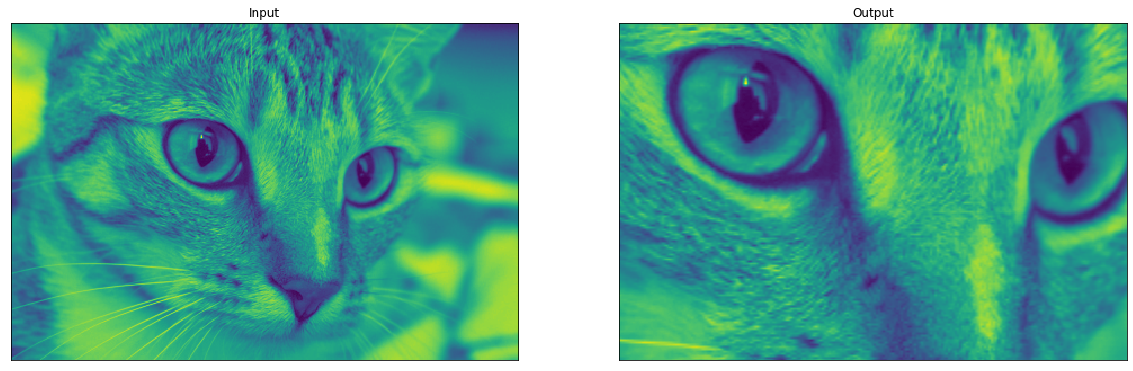

In [192]:
'''
input: the image that you want rotated.
output: the Mat object to put the resulting file in.
alpha: the rotation around the x axis
beta: the rotation around the y axis
gamma: the rotation around the z axis (basically a 2D rotation)
dx: translation along the x axis
dy: translation along the y axis
dz: translation along the z axis (distance between lens and the object) (commonly use 200)
f: focal distance (distance between lens and image, a smaller number exaggerates the effect)

Author : Michael Jepson 
Original src : C++ 
Original src's URL : http://jepsonsblog.blogspot.com/2012/11/rotation-in-3d-using-opencvs.html
'''
def rotateImage(input, alpha, beta, gamma, dx, dy, dz, f):
    #alpha = (alpha - 90.)*np.pi/180.;
    #beta = (beta - 90.)*np.pi/180.;
    #gamma = (gamma - 90.)*np.pi/180.;
    alpha = (alpha)*np.pi/180.;
    beta = (beta)*np.pi/180.;
    gamma = (gamma)*np.pi/180.;
    
    
    # get width and height for ease of use in matrices
    h,w = input.shape[:2]
    print('height:',h,'width:',w)
    
    # Projection 2D -> 3D matrix
    A1 = np.array([
        [1,0,-w/2.],
        [0,1,-h/2.],
        [0,0,0],
        [0,0,1]])
    
    # Rotation matrices around the X, Y, and Z axis
    RX = np.array([
        [1,0,0,0],
        [0,np.cos(alpha),-np.sin(alpha),0],
        [0,np.sin(alpha), np.cos(alpha),0],
        [0,0,0,1]])
    
    RY = np.array([
        [np.cos(beta),0,-np.sin(beta),0],
        [0           ,1,            0,0],
        [np.sin(beta),0, np.cos(beta),0],
        [0,0,0,1]])
    
    RZ = np.array([
        [np.cos(gamma),-np.sin(gamma),0,0],        
        [np.sin(gamma), np.cos(gamma),0,0],
        [0           ,0,            1,0],
        [0,0,0,1]])
    
    # Composed rotation matrix with (RX, RY, RZ)
    R = np.dot(RZ,np.dot(RY,RX))
    R2 = RZ@RY@RX
    if not(np.array_equal(R2,R)):
        print(R2-R)
    
    # Translation matrix
    T = np.array([
        [1,0,0,dx],        
        [0,1,0,dy],
        [0,0,1,dz],
        [0,0,0,1]])
    
    A2 = np.array([
        [f,0,w/2.,0],        
        [0,f,h/2.,0],        
        [0,0,1,0]])
    
    # Final transformation matrix       
    M2 = np.dot(A2,np.dot(T,np.dot(R,A1)))
    M = A2 @ (T @ (R @ A1))
    if not(np.array_equal(M2,M)):
        print(M2-M)
    print(M)
    
    
    
    dst = cv2.warpPerspective(img,M,(w,h))
    return dst


img = cv2.imread('cat_cv.tif',0)
h,w = img.shape[:2]

dst = rotateImage(img,0,0,0,0,0,50,100)
    
plt.figure(figsize=(20,10))    
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.xticks([]);plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.xticks([]);plt.yticks([])
plt.show()

In [165]:
?cv2.warpPerspective

Docstring:
warpPerspective(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]]) -> dst
.   @brief Applies a perspective transformation to an image.
.   
.   The function warpPerspective transforms the source image using the specified matrix:
.   
.   \f[\texttt{dst} (x,y) =  \texttt{src} \left ( \frac{M_{11} x + M_{12} y + M_{13}}{M_{31} x + M_{32} y + M_{33}} ,
.        \frac{M_{21} x + M_{22} y + M_{23}}{M_{31} x + M_{32} y + M_{33}} \right )\f]
.   
.   when the flag #WARP_INVERSE_MAP is set. Otherwise, the transformation is first inverted with invert
.   and then put in the formula above instead of M. The function cannot operate in-place.
.   
.   @param src input image.
.   @param dst output image that has the size dsize and the same type as src .
.   @param M \f$3\times 3\f$ transformation matrix.
.   @param dsize size of the output image.
.   @param flags combination of interpolation methods (#INTER_LINEAR or #INTER_NEAREST) and the
.   optional flag #WARP_INVERSE_MAP, th